In [1]:
import matplotlib.pyplot as plt
import matplotlib
from pylab import figure, text, scatter, show
import sys, math, numpy
%matplotlib inline

import seaborn as sns
sns.set_theme()
sns.set_style(style='white')
sns.set_style("ticks")

In [2]:
def load_dist(sys, theory):
    return numpy.load(f'./dist_npy/{sys}.{theory}.dist.npy'),  numpy.load(f'./dist_npy/{sys}.{theory}.label.npy')

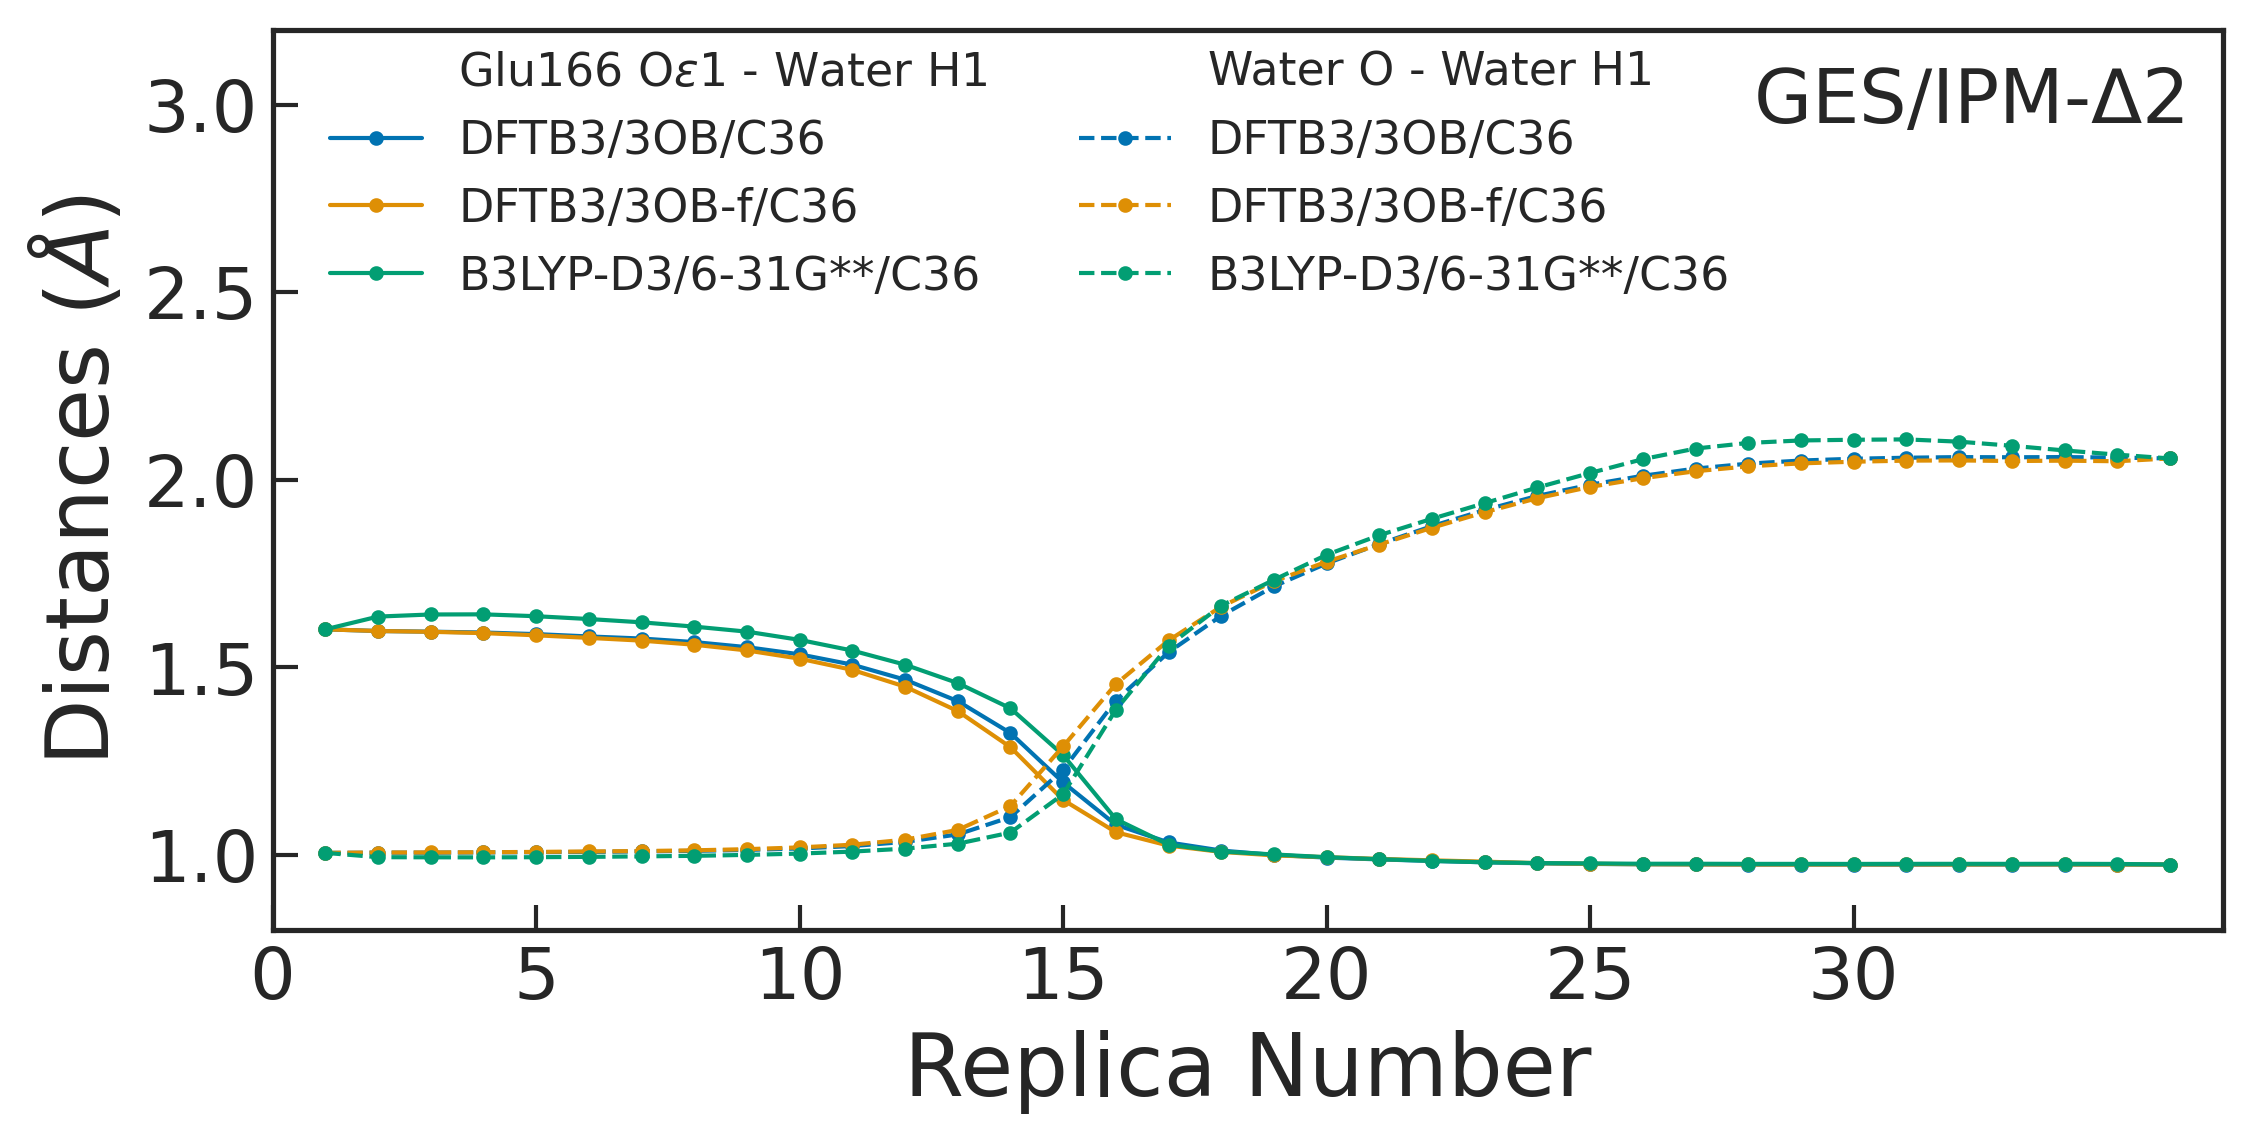

In [3]:
# init figure ==================================================================
fig, ax,  = plt.subplots(figsize=(8, 8), dpi=300, facecolor='w', edgecolor='k', )
plt.subplots_adjust(left=1/8, right=7.5/8, top=4/8, bottom=1/8)

# spine
ax.set_xlim(0, 37)
ax.set_ylim(0.8, 3.2)

ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.xticks([5*x for x in range(7)])

ax.set_xlabel(r'Replica Number', fontsize='xx-large')
ax.set_ylabel('Distances '+r'($\AA$)', fontsize='xx-large')

# tick & labels on x and y
ax.tick_params(which='major', direction='in', length=6, width=1, labelsize='x-large', )

# load dftb data ================================================================
sysname='d2'

dftb_3ob,  _ = load_dist(sysname, '3ob')
dftb_3obf, _ = load_dist(sysname, '3ob_f')
b3lyp,     _ = load_dist(sysname, 'b3lyp')

""" 'GLU.161.OE1:TIP3.287.H1', 
    'TIP3.287.H1:TIP3.287.OH2',
    'TIP3.287.OH2:IMI.286.C7', 
    'IMI.286.C7:SER.64.OG',
    'SER.64.OG:LYS.67.HZ1', 
    'LYS.67.NZ:LYS.67.HZ1',
"""
lbl = [
    r'Glu166 O$\epsilon$1 - Water H1',
    r'Water O - Water H1',
    r'Water O - IPM C7',
    r'IPM C7 - Ser70 O$\gamma$',
    r'Ser70 O$\gamma$ - Lys73 H$\zeta$1',
    r'Lys73 N$\zeta$ - Lys73 H$\zeta$1',
]
tag = r'GES/IPM-$\Delta$1' if sysname == 'd1' else r'GES/IPM-$\Delta$2'

ax.text(0.98, 0.96, tag, ha='right', va='top', transform=ax.transAxes, fontsize=18)

d0=0 #0, 2, 4
d1=d0+1
ax.plot([0], marker='None', linestyle='None', label=lbl[d0])
ax.plot(numpy.arange(1, 37),  dftb_3ob[:, d0], ls='-', color=sns.color_palette('colorblind')[0], marker='.', markersize=5, linewidth=1, label="DFTB3/3OB/C36")
ax.plot(numpy.arange(1, 37), dftb_3obf[:, d0], ls='-', color=sns.color_palette('colorblind')[1], marker='.', markersize=5, linewidth=1, label="DFTB3/3OB-f/C36")
ax.plot(numpy.arange(1, 37),     b3lyp[:, d0], ls='-', color=sns.color_palette('colorblind')[2], marker='.', markersize=5, linewidth=1, label="B3LYP-D3/6-31G**/C36")
ax.plot([0], marker='None', linestyle='None', label=lbl[d1])
ax.plot(numpy.arange(1, 37),  dftb_3ob[:, d1], ls='--', color=sns.color_palette('colorblind')[0], marker='.', markersize=5, linewidth=1, label="DFTB3/3OB/C36")
ax.plot(numpy.arange(1, 37), dftb_3obf[:, d1], ls='--', color=sns.color_palette('colorblind')[1], marker='.', markersize=5, linewidth=1, label="DFTB3/3OB-f/C36")
ax.plot(numpy.arange(1, 37),     b3lyp[:, d1], ls='--', color=sns.color_palette('colorblind')[2], marker='.', markersize=5, linewidth=1, label="B3LYP-D3/6-31G**/C36")

plt.legend(bbox_to_anchor=(0.02, 0.68, 1., .102), loc='lower left', borderaxespad=0., ncol=2, frameon=False)

fig.savefig(f'{sysname}_bm_{d0}{d1}.png')
plt.show()